#1. Introduction (Business Understanding)

GoalZone is a fitness club chain in Canada. GoalZone offers fitness classes like HIIT, Cycling, Yoga, etc. Even though there is a high demand for many of the classes, often being fully booked, a issue persists: many fully booked classes have low attendance rates due to a high number of no-shows.

This inefficiency not only leads to wasted resources and missed opportunities for other members to participate but also creates challenges in optimizing class scheduling and management process.

To address this problem, GoalZone is seeking to develop a predictive model that can anticipate whether a member will attend a scheduled class based on their booking details and membership information.

By predicting no-shows, the fitness club can better manage class capacity.

**Research Questions:**

1 - Can we predict whether a member will attend a class based on their booking details and membership information?

2 - Does the number of months as a member influence class attendance rates?

3 - Does the time of the class impact attendance?

4 - Which features are the most influential in predicting attendance?


**Goal:** The primary goal of this project is to build a model capable of predicting whether a fitness club member will attend a scheduled class based on factors such as membership duration, days booked in advance, class type, and other relevant attributes. Additionally, the project will involve an investigation of the most relevant features influencing attendance, providing data-driven insights that will enable the fitness club to make informed decisions about class management.

**Business Objective:** Improve class management by using predictive modeling to identify patterns and reasons behind no-shows. Identifying the most influential features affecting class attendance, the fitness club will be able to make data-driven decisions to optimize class schedules and reduce resource wastage.

**Success Criteria:** The success of the model will be evaluated using statistical performance metrics. A model with a high recall rate for predicting no-shows, combined with balanced performance across all metrics, will ensure that GoalZone can improve its class capacity and attendance.

Dataset: [GoalZone - Member Info](https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification/data)

#2. Data Understanding (Dataset Overview)

The dataset contains 8 colums with booking details and membership information. The columns are:

booking_id: The unique identifier of the booking.

months_as_member: The number of months as this fitness club member, minimum 1 month.

weight: The member's weight in kg, rounded to 2 decimal places.

days_before: The number of days before the class the member registered.

day_of_week: The day of the week of the class.

time: The time of day of the class. Either AM or PM.

category: The category of the fitness class.

attended: Whether the member attended the class (1) or not (0).

The variable target is 'attended' which indicates whether a member attended to the class previous booked. Since is a binary variable, a predictive model for classification will be developed.

All data used in this project has been anonymized to ensure no personal details of members are included, adhering to ethical data usage standards.

##Data Collection:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv("/content/GoalZone.csv")

##Data Description

In [ ]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [ ]:
df.tail()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1500,20,94.39,8,Thu,AM,Cycling,1


In [ ]:
df.shape

(1500, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


There are 1,500 entries in the dataset, representing information about 1,500 class bookings. It is also observed that there are 20 missing values in the 'weight' column, which will be addressed in the following steps.

##Initial Exploration

To begin the data preparation, let's check the entries in the categorical columns.

In [ ]:
for column in df:
    if df[column].dtype == "object":
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)

        if num_unique_values == 2:
            print(f"\nBinary column '{column}' with values: {unique_values}")
        else:
            print(f"\nMulticategorical column '{column}' with values: {unique_values}")


Multicategorical column 'days_before' with values: ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']

Multicategorical column 'day_of_week' with values: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']

Binary column 'time' with values: ['PM' 'AM']

Multicategorical column 'category' with values: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


The days_before, day_of_week, and category columns contain some inconsistencies in the values.

Cleaning days_before: some values in the column contain the word "days". It will be necessary to extract the numerical part and convert it to an integer.

In [ ]:
# removin the 'days' text and convert to integer
df['days_before'] = df['days_before'].str.extract('(\d+)').astype(int)

Cleaning day_of_week: the column contains both abbreviated and full day names, with some inconsistencies like "Wednesday" and "Mon". It is necessary to normalize the values.

In [ ]:
# dictionary for the day of the week
day_mapping = {
    'Wed': 'Wednesday', 'Wednesday': 'Wednesday', 'Fri.': 'Friday',
    'Fri': 'Friday', 'Mon': 'Monday', 'Monday': 'Monday',
    'Sun': 'Sunday', 'Thu': 'Thursday', 'Tue': 'Tuesday', 'Sat': 'Saturday'
}

# mapping the values
df['day_of_week'] = df['day_of_week'].map(day_mapping)

Cleaning category: the column has a - value, which may be an invalid or missing value.

In [ ]:
#how many rows have the '-' value in the 'category' column
num_invalid_values = df[df['category'] == '-'].shape[0]
print(f"Number of rows with invalid category value '-': {num_invalid_values}")

Number of rows with invalid category value '-': 13


The missing values are not too numerous, so they will be replace with the most frequent category.

In [ ]:
#most frequent (mode) value in the 'category' column
most_frequent_category = df[df['category'] != '-']['category'].mode()[0]
print(f"The most frequent category is: {most_frequent_category}")

The most frequent category is: HIIT


In [ ]:
# Replace the '-' values with the most frequent category
df['category'] = df['category'].replace('-', most_frequent_category)

##Distribution of Numerical Variables

There are three numerical variables in the dataset: days_before, months_as_member, and weight. The summary statistics for these variables are shown above.

In [ ]:
#Summary Stats for Numerical Variables
df[['days_before', 'months_as_member', 'weight']].describe()

,days_before,months_as_member,weight
count,1500.000000,1500.000000,1480.000000
mean,8.346667,15.628667,82.610378
std,4.077938,12.926543,12.765859
min,1.000000,1.000000,55.410000
25%,4.000000,8.000000,73.490000
50%,9.000000,12.000000,80.760000
75%,12.000000,19.000000,89.520000
max,29.000000,148.000000,170.520000


Many insights are possible to get from the summary statistical of the numerical variables, highlighting:

days_before: average booking is made about 8.35 days before the class, with most bookings happening between 4 and 12 days in advance. The minimum booking was 1 day before the class, and the maximum was 29 days.

months_as_member: average member has been with the club for about 15.63 months, with a wide range from 1 month to 148 months. Half of the members have been with the club between 8 and 19 months.

weight: The average weight of members is approximately 82.61 kg, with most members' weight ranging between 73.49 kg and 89.52 kg.

###Histogram for Numerical Variables

The distribution of the numerical variables can be visualized in the following histograms.

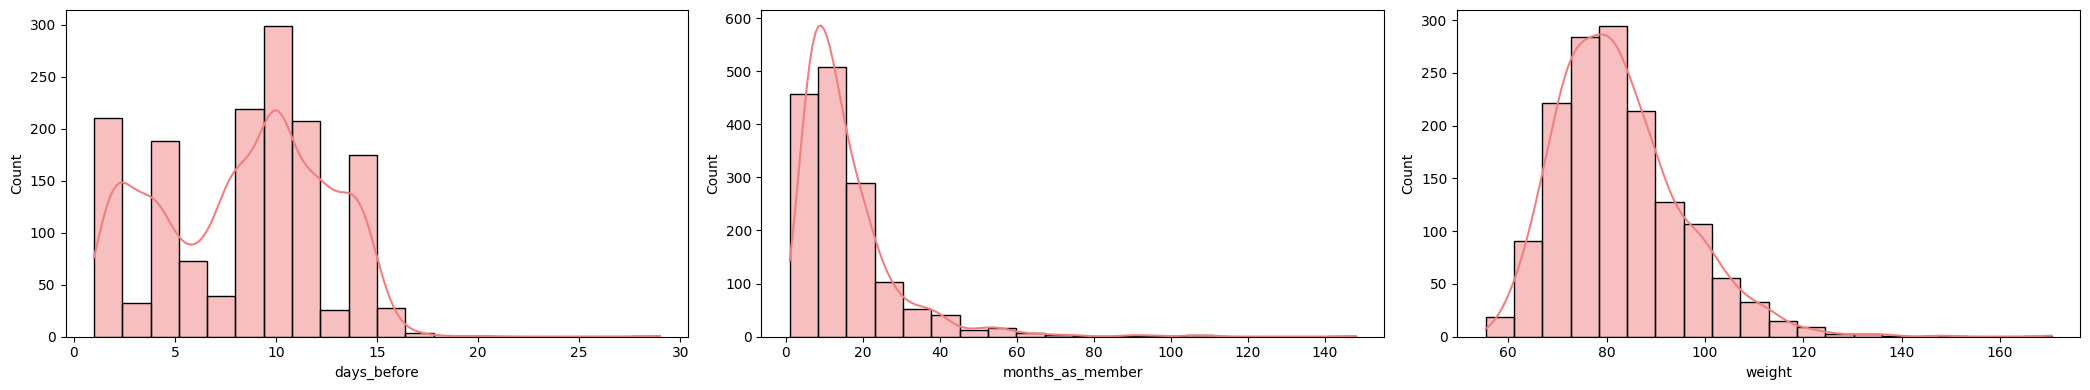

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(21, 4))

for i, col in enumerate(['days_before', 'months_as_member', 'weight']):
    sns.histplot(data=df, x=col, kde=True, bins=20, color='lightcoral', ax=ax[i])

plt.tight_layout()
plt.show()

days_befores: peaks around 2, 10 and 12 days. These are number of days that are more popular for booking classes in advance. The highest peak suggests that many members tend to book classes approximately 10 days in advance.There are smaller peaks, indicating diffent behavior from members when booking classes.

months_as_member: right-skewed with a large number of members between 0 and 20 months, and very few members with more than 40 months. The peak is around 5-10 months. This distribution suggests that most members are relatively new to the fitness club, with only a few long-term members.

weight: the distribution is right-skewed with a peak around 70-80 kg. There is a wide spread, with most weights between 60 and 100 kg. There is a small number of members who have weights from 120kg up to 170 kg, indicating the presence of outliers.

##Relationship Between Numerical Variables and Target Variable

To explore the relationship between the numerical variables and the target variable we can plot a scatter matrix where each scatter plot shows how pairs of numerical variables interact, with colors indicating class attendance.

###Scatter Matrix

In [ ]:
import plotly.express as px

fig = px.scatter_matrix(df, dimensions=['days_before', 'months_as_member', 'weight'], color="attended", title="Scatter Matrix of Numerical Features", labels={"attended": "Attended Class"})

fig.show()

days_before vs. months_as_member: there is a clustering of points indicating that most bookings are made around 1–16 days before class for members within 45 months with the club. However, more long-term members tend to make bookings, and attend, around 10 days before the class date.

months_as_member vs. weight: no strong linear relationship is observed between the variables. Both new and long-term members vary in weight, indicating weight is not a key factor to membership duration.

days_before vs. weight: The distribution shows most members book between 0 and 15 days before class, across various weight ranges, with no clear relationship between these two variables.

###Boxplot

Another way of examining the relationship between numerical variables and the target variable is through a boxplot, which allows us to visualize the distribution of numerical features based on whether the class was attended or not.

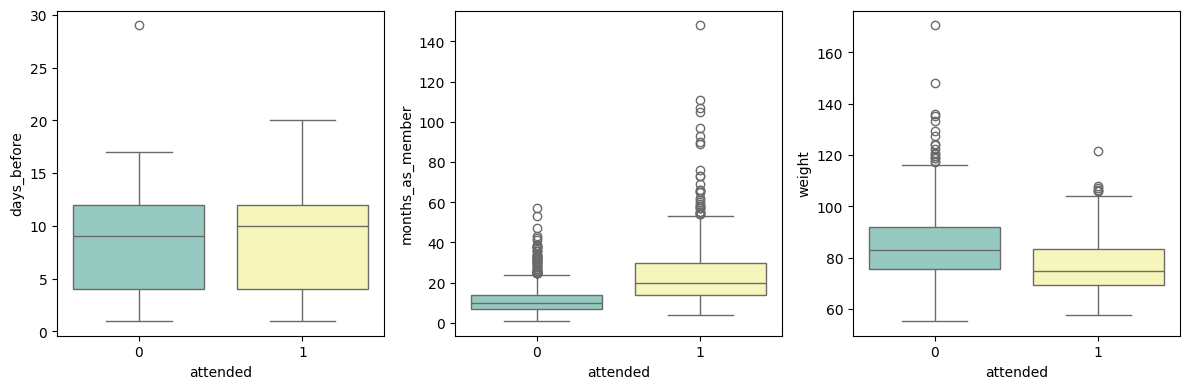

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(['days_before', 'months_as_member', 'weight']):
    sns.boxplot(data=df, x='attended', y=col, palette='Set3', hue='attended', dodge=False, ax=ax[i])
    ax[i].legend_.remove()

plt.tight_layout()
plt.show()

days_before vs. attended: both groups show a similar range, from 0 to around 20 days, indicating that members tend to book classes within this window with a median for members who did not attend slightly lower. There are outliers in the not attended group, bookings made around 30 days in advance, indicating that early bookings don’t necessarily translate to attendance.

months_as_member vs. attended: median value is higher for those who attended compared to those who did not attend. This suggests that members who have been in the club for a longer time are more likely to attend classes. Members with very long membership durations (over 80 months) are more likely to attend classes, with these outliers falling into the "Attended" category.

weight vs. attended: median of members who did not attend classes is slightly higher than those who attended it. The box plot suggests that members who do not attend classes tend to have slightly higher weights, with more outliers on the heavier side. The attended group also has some outliers, but they are fewer and less extreme.

##Member Categories

Since the months_as_member variable appears to have an influence on class attendance, analyze this variable as member categories can help us to identify possible patterns.  Members will be group based on how long they are members, then we can analyze attendance trends across the different groups.

Cutoff points for member categories:

New Member: 0–6 months

Mid-Term Member: 7–24 months

Long-Term Member: 25+ months

In [ ]:
# Defining the bins and labels
bins = [0, 6, 24, df['months_as_member'].max()]
labels = ['New', 'Mid-Term', 'Long-Term']

# Create a new column 'member_category'
df['member_category'] = pd.cut(df['months_as_member'], bins=bins, labels=labels, right=True, include_lowest=True)

In [ ]:
df['member_category'] = df['member_category'].astype(object)

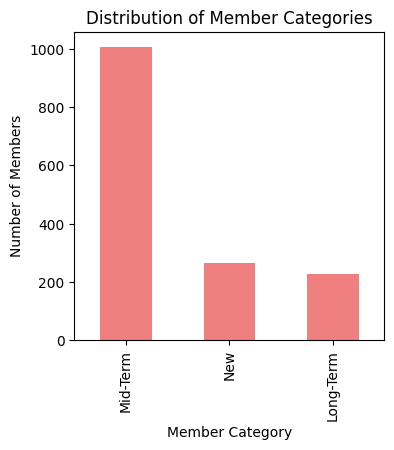

In [ ]:
# distribution of months_as_members across the new categories
category_counts = df['member_category'].value_counts()

plt.figure(figsize=(4, 4))
category_counts.plot(kind='bar', title='Distribution of Member Categories', color = 'lightcoral')
plt.xlabel('Member Category')
plt.ylabel('Number of Members')
plt.show()

Mid-Term members dominate the dataset, with over 1,000 members into this category, so most class bookings are made by members who have been with the club for a moderate period (7–24 months).
New members and Long-Term members have similar representation in the data, with both categories having less bookings.


###Attendance rates by member category

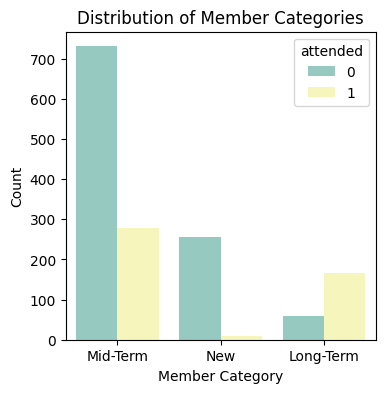

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='member_category', hue='attended', palette='Set3')
plt.title('Distribution of Member Categories')
plt.xlabel('Member Category')
plt.ylabel('Count')
plt.show()

In [ ]:
#attendance rates
attendance_rates_members = pd.crosstab(df['member_category'], df['attended'], normalize='index') * 100
attendance_rates_members.columns = ['Did Not Attend (%)', 'Attended (%)']
print(attendance_rates_members)

                 Did Not Attend (%)  Attended (%)
member_category                                  
Long-Term                 25.777778     74.222222
Mid-Term                  72.447968     27.552032
New                       96.616541      3.383459


Long-term members: high attendance rate (74.22%).

New members: extremely low attendance rate (3.38%).

Mid-term members: significantly higher attendance rate (27.55%) compared to new members, but there is still a large proportion (72.45%) that did not attend.

###Relationship between member_category and days_before

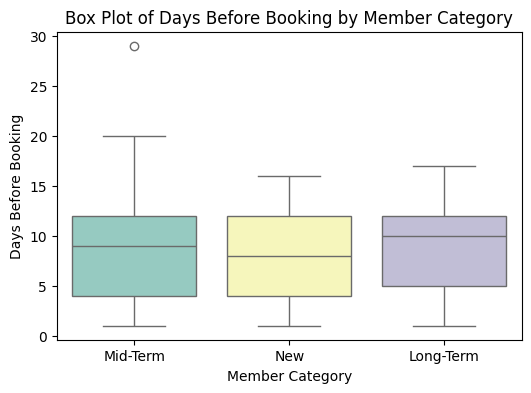

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=df, x='member_category', y='days_before', hue='member_category',  palette='Set3' , dodge=False)

plt.title('Box Plot of Days Before Booking by Member Category')
plt.xlabel('Member Category')
plt.ylabel('Days Before Booking')
plt.show()

Mid-Term members: greatest range in booking days, from around 0 to 21 days (excluding the outlier at 29 days).

New members:range from 0 to around 15 days, with lower  median around 8.

Long-Term members: range from 0 to around 13 days, with the higher median around 10. Again, is possible to see that long-term members tend to make bookings around 10 days before the class date.

No outliers are visible for the "New" or "Long-Term" categories, suggesting more consistent booking behavior within these groups.




##Analysis for the variable 'days_before'

###Box Plot of Days Before Booking by Class Category

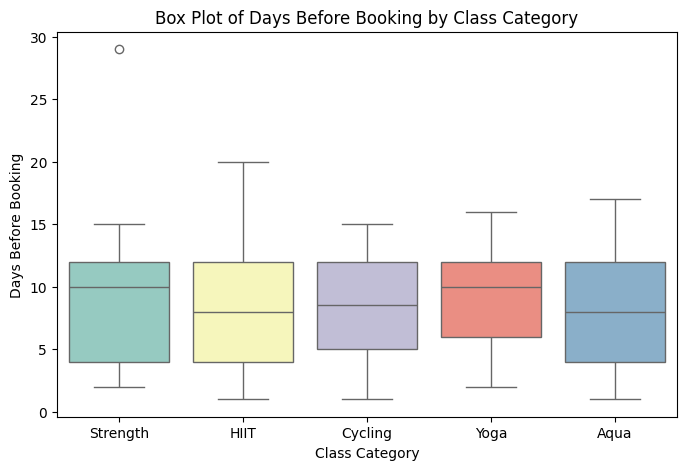

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x='category', y='days_before', palette='Set3', hue='category', dodge=False, legend=False)

plt.title('Box Plot of Days Before Booking by Class Category')
plt.xlabel('Class Category')
plt.ylabel('Days Before Booking')
plt.show()

The days before booking do not vary significantly across different class categories. This suggests that members' booking behavior is relatively consistent, regardless of the type of class they are booking. The similar medians and IQRs across categories imply that class type might not be a strong factor influencing how far in advance members book their classes.

###Box Plot of Days Before Booking by Day of Week

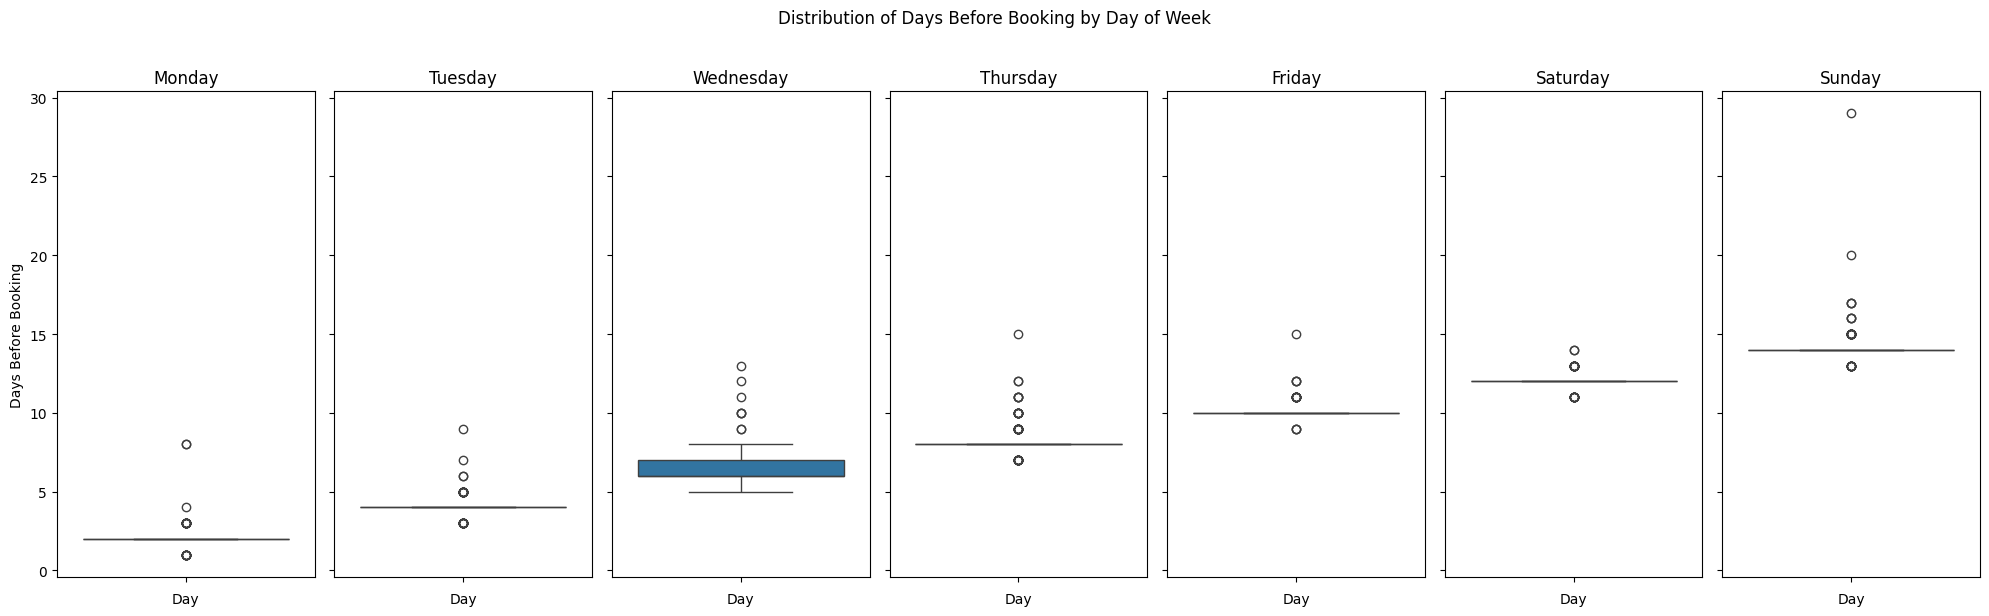

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20, 6), sharey=True)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, day in enumerate(days):
    sns.boxplot(data=df[df['day_of_week'] == day], y='days_before', ax=axes[i])
    axes[i].set_title(day)
    axes[i].set_xlabel('Day')
    if i == 0:
        axes[i].set_ylabel('Days Before Booking')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Distribution of Days Before Booking by Day of Week', y=1.02)
plt.tight_layout()

plt.show()

Sunday has the highest median, around 15. Saturday and Friday also present medians above 10. This indicate that members tend to book classes for these days earlier compared to other days of the week.

Among the days of the week, Wednesday stands out with the widest interquartile range. It also has outliers suggesting more variability booking behavior.

##Distribution of Categorical Variables

There are four categotical variables in the dataset: time, day_of_week and category (class category) and the target variable attended.

The distribution of the categorical variables are show above.

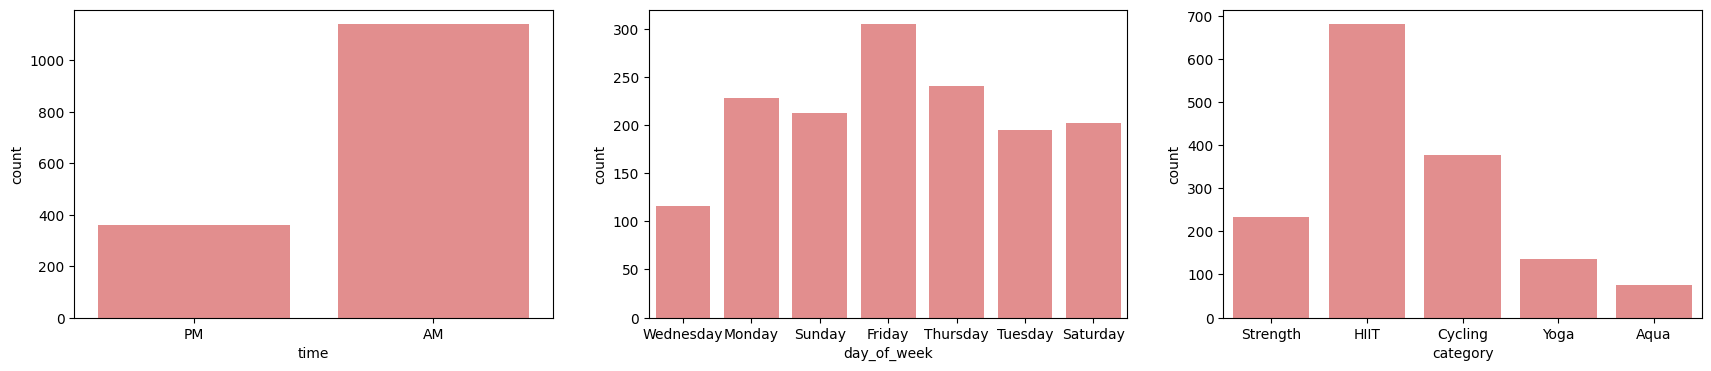

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,4))
for i, col in enumerate(['time', 'day_of_week', 'category']):
  sns.countplot(data=df, x=col, ax=ax[i], color = 'lightcoral')

There is a clear preference for classes scheduled in the morning (over 1000 occurrences) and on Friday (more than 300 occurrences). HIIT classes are the most frequently scheduled, with nearly 700 occurrences, followed by Cycling classes, which have about 400 occurrences.

###Attendance distribution by time, day_of_week, and class category

The bar plots above have hue as the target variable (attended), so it is possible to observe the distribution of categories across different classes and identify potential patterns or trends.

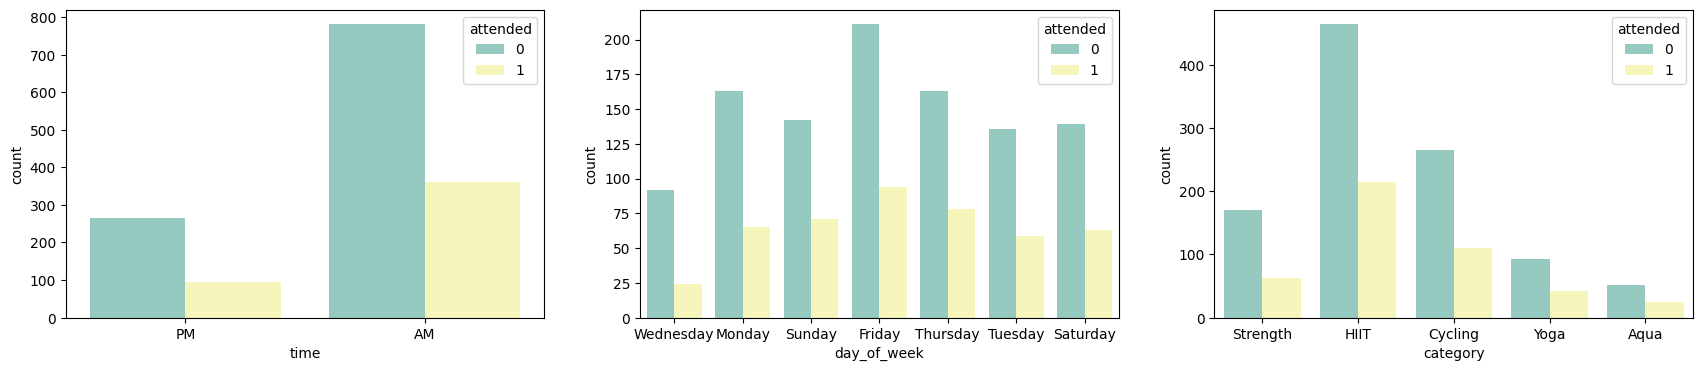

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,4))
for i, col in enumerate(['time', 'day_of_week', 'category']):
  sns.countplot(data=df, x=col,hue='attended', palette='Set3', ax=ax[i])

In [ ]:
attendance_rates_time = pd.crosstab(df['time'], df['attended'], normalize='index') * 100
attendance_rates_time.columns = ['Did Not Attend (%)', 'Attended (%)']
attendance_rates_time_sorted = attendance_rates_time.sort_values(by='Did Not Attend (%)', ascending=False)

print(attendance_rates_time_sorted)

      Did Not Attend (%)  Attended (%)
time                                  
PM             73.816156     26.183844
AM             68.448729     31.551271


The time of the class does not seem to have a significant influence on attendance, as the attendance rates for AM (31.55%) and PM (26.18%) classes are fairly similar. However, AM classes show a slightly higher attendance rate.

In [ ]:
attendance_rates_week = pd.crosstab(df['day_of_week'], df['attended'], normalize='index') * 100
attendance_rates_week.columns = ['Did Not Attend (%)', 'Attended (%)']
attendance_rates_week_sorted = attendance_rates_week.sort_values(by='Did Not Attend (%)', ascending=False)

print(attendance_rates_week_sorted)

             Did Not Attend (%)  Attended (%)
day_of_week                                  
Wednesday             79.310345     20.689655
Monday                71.491228     28.508772
Tuesday               69.743590     30.256410
Friday                69.180328     30.819672
Saturday              68.811881     31.188119
Thursday              67.634855     32.365145
Sunday                66.666667     33.333333


Sunday has the highest attendance rate at 33.33%, followed by Thursday (32.37%) and Saturday (31.19%).

On the other hand, Wednesday shows the lowest attendance rate, with only 20.69% of classes attended and lowest number of total bookings. It seems to be an unpopular day for classes overall.


In [ ]:
attendance_rates_category = pd.crosstab(df['category'], df['attended'], normalize='index') * 100
attendance_rates_category.columns = ['Did Not Attend (%)', 'Attended (%)']
attendance_rates_category_sorted = attendance_rates_category.sort_values(by='Did Not Attend (%)', ascending=False)

print(attendance_rates_category_sorted)

          Did Not Attend (%)  Attended (%)
category                                  
Strength           73.390558     26.609442
Cycling            70.744681     29.255319
Yoga               68.888889     31.111111
HIIT               68.382353     31.617647
Aqua               67.105263     32.894737


Most classes have attendance rates of around 30%. While HIIT classes have the highest number of bookings, they still have a similar attendance rate compared to other classes. Aqua classes have the lowest number of bookings but similar attendance rate to the other classes. Strength classes are the third most popular in terms of bookings, but they have the highest no-show rate.

##Target Class Distribution

Value Counts

In [ ]:
class_counts = df['attended'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
attended
0    1046
1     454
Name: count, dtype: int64


Class Percentages

In [ ]:
class_percentages = df['attended'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)


Class Percentages:
attended
0    69.733333
1    30.266667
Name: proportion, dtype: float64


Visualizing the Distribution

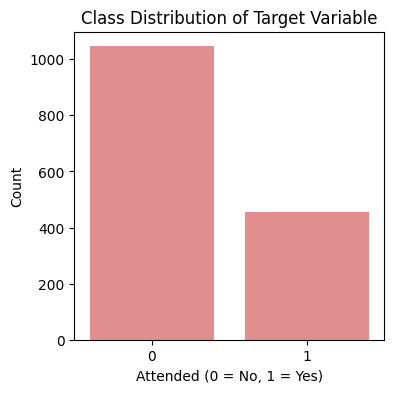

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='attended', data=df, color = 'lightcoral')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Attended (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The target variable, attended, is imbalanced, with the majority class being '0' (did not attend). Approximately 70% of the records consist of members who did not attend the class, while only 30% of the records represent members who attended. This imbalance was expected, as the business had reported a high number of no-shows in booked classes.

##Correlation matrix

In [ ]:
df_encoded = pd.get_dummies(df.drop(['booking_id','months_as_member'], axis=1))

In [ ]:
correlation_matrix_encoded = df_encoded.corr()

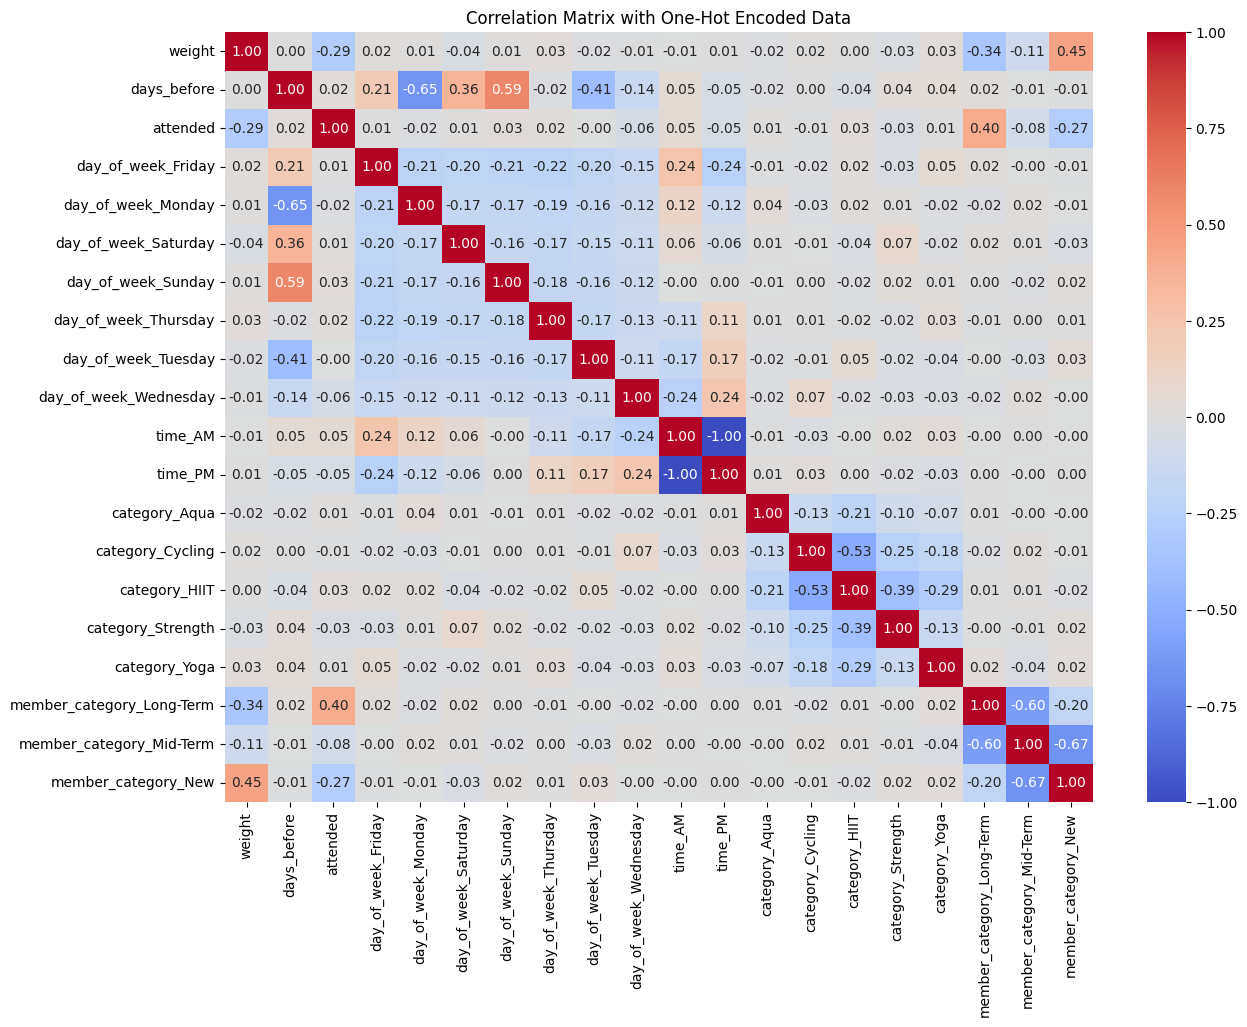

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix with One-Hot Encoded Data")
plt.show()

Positive Correlations

member_category_New and weight: there is a positive correlation of 0.45, suggesting that new members tend to have higher weights. This could indicate that new members may join the fitness club to achieve weight-related goals.

member_category_Long-Term and attended: there is a positive correlation of 0.40. This suggests that long-term members are more likely to attend classes compared to other member categories.

days_before and day_of_week: there is a positive correlation indicating that Sunday, Saturday and Friday classes tend to be booked further in advance.

Negative Correlations

member_category_Long-Term and weight: negative correlation of -0.34, suggesting that long-term members tend to have lower weights compared to newer members.

weight and attended: negative correlation of -0.29, indicating that members with higher weights are less likely to attend classes.

member_category_New and attended: negative correlation of -0.27, indicating that new members are less likely to attend classes.

days_before and day_of_week: negative correlation of -0.65 with Monday and -0.41 with Tuesday, indicating that members are more likely to book classes  closer to the date for these days.

#3. Data Preparation (Data Cleaning)

##Handling Missing Values

In [ ]:
df.isnull().sum()

,0
booking_id,0
months_as_member,0
weight,20
days_before,0
day_of_week,0
time,0
category,0
attended,0
member_category,0


Checking Weight Distribution

<Axes: ylabel='weight'>

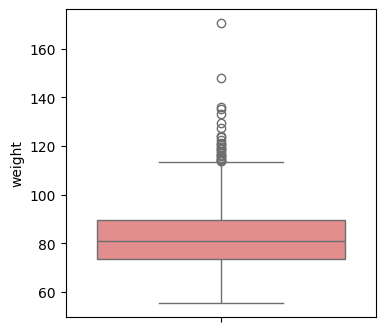

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(df['weight'], color='lightcoral')

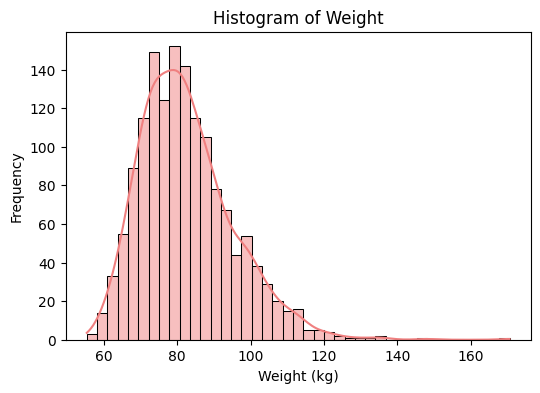

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['weight'].dropna(), kde=True, color = 'lightcoral')
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

Statical test to confirm normal distribution

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk test
stat, p = shapiro(df['weight'].dropna())
print('Shapiro-Wilk Test Statistics=%.3f, p-value=%.3f' % (stat, p))

if p > 0.05:
    print('Data is likely normally distributed (fail to reject H0)')
else:
    print('Data is likely not normally distributed (reject H0)')

Shapiro-Wilk Test Statistics=0.952, p-value=0.000
Data is likely not normally distributed (reject H0)


The Shapiro-Wilk test yielded a p-value less than 0.05, indicating that the weight variable is not normally distributed. Visual inspection of the histogram and boxplot confirmed that the data is right-skewed with some outliers. Therefore, median imputation is going to fill in the missing values in the weight column, as the median is more robust to skewness and outliers than the mean.

In [ ]:
# Median Imputation
median_weight = df['weight'].median()
df['weight'].fillna(median_weight, inplace=True)

# 4. Modeling (Methodology)

To address the research questions, a combination of data preprocessing, exploratory data analysis (EDA), oversampling, and machine learning models is being used.

The dataset was cleaned and preprocessed: missing values were handled, categorical variables were encoded, and EDA was performed to understand patterns and relationships between variables. To address the imbalance in the target variable (attended vs. no-show), the SMOTE (Synthetic Minority Oversampling Technique) method will be applied to balance the classes.

Following this, three machine learning models—Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN)— will be developed and evaluated. Grid Search will be used for hyperparameter tuning to optimize each model’s performance.

The models will be evaluated using metrics such as accuracy, precision, recall, and F1-score to determine which best predicts class attendance and no-shows. Additionally, feature importance will be investigated to identify which factors have the greatest influence on predicting attendance.

Based on these results, data-driven insights and recommendations will be provided to improve class attendance and reduce no-shows.

##Data Transformation

###Encoding Categorical Variables

In [ ]:
# Encoding categorical features to numerical
df_encoded = pd.get_dummies(df[['time', 'day_of_week', 'category']], dtype=int)

In [ ]:
# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df.drop(columns=['booking_id','time', 'day_of_week', 'category', 'member_category']), df_encoded], axis=1)

The following DataFrame shows the variable tha will be used to train and test the models. The variable 'booking_id' was drop, since is only used to identify the book.

In [ ]:
df.head()

,months_as_member,weight,days_before,attended,time_AM,time_PM,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79.56,8,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,79.01,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,16,74.53,14,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,5,86.12,10,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,15,69.29,8,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
X = df.drop('attended', axis=1)
y = df['attended']

##Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Using stratify=y ensures that the class distribution remains balanced in both training and testing sets.

##Addressing Target Class Imbalance

Performing oversampling of the minitory class after splitting the data in training and testing sets.

The  SMOTE (Synthetic Minority Over-sampling Technique) was choose, because generates synthetic samples of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
train_balanced = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [ ]:
print("\nClass distribution after oversampling:")
print(train_balanced['attended'].value_counts())


Class distribution after oversampling:
attended
1    837
0    837
Name: count, dtype: int64


Now, the train set is balanced.

##Scaling

Scaling is particularly important for algorithms like Logistic Regression. For Random Forests, scaling is less critical because these algorithms are not sensitive to the feature scales. However, scaling won't negatively impact these models and can maintain consistency across the preprocessing steps.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

##Models

The models will be optimized using Grid Search, which ensures that the best combination of hyperparameters is selected, allowing for the highest possible performance.

###Logistic Regression

Logistic Regression is a linear model used for binary classification tasks. It estimates the probability that a given input point belongs to a certain class.

Training the Model

In [ ]:
# Using Grid Search for best parameters
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')

# Setting the parameters grid to be tested
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 300, 400]}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_

# Best parameters & cross-validation scorefrom Grid Search
print('Best Params: ', best_params, '\n')
print('Best Cross-Validation Score:',grid_search.best_score_,'\n')

# Train the model with the best parameters
best_lr = grid_search.best_estimator_

Best Params:  {'C': 10, 'max_iter': 100, 'penalty': 'l2'} 

Best Cross-Validation Score: 0.8029296630619358 



Making Predictions

In [ ]:
# Make predictions with the best model
y_pred_lr = best_lr.predict(X_test_scaled)

Evaluating the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 79.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       209
           1       0.73      0.52      0.61        91

    accuracy                           0.80       300
   macro avg       0.77      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300



Confusion Matrix

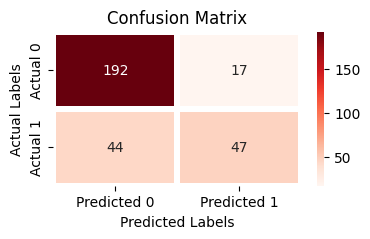

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4, 2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], linewidth=3)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

plt.show()

 The model performs well on predicting no-shows with TN of 192. There are 44 FN, meaning that the model failed to predict some attendees, which is important in the context of reducing no-shows.

###K-Nearest Neighbors (KNN)

KNN is a simple algorithm that stores all available cases and predicts the target variable based on a similarity measure (e.g., distance functions).

Training the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Setting the parameters grid to be tested
params_grid = {'n_neighbors': range(2, 16, 2), 'weights': ['distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(estimator=knn,param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(2, 16, 2),
                         'weights': ['distance']},
             verbose=2)

In [ ]:
# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}\n")

# Using the best_estimator_ attribute from the grid_search class to create the best model
best_knn = grid_search.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best Cross-Validation Score: 0.7927768343909196



Making Predictions

In [ ]:
y_pred_knn = best_knn.predict(X_test_scaled)

Evaluating the Model

In [ ]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors (KNN) Accuracy: {:.2f}%".format(accuracy_knn * 100))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Accuracy: 74.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       209
           1       0.58      0.54      0.56        91

    accuracy                           0.74       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.74      0.74      0.74       300



Consfusion Matrix

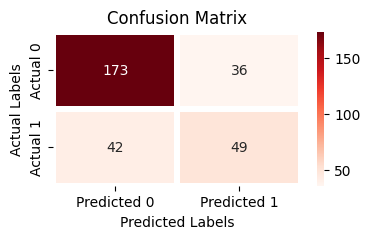

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], linewidth=3)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

plt.show()

When comparing with LR model, the KNN model has slightly lower TN count, 173 vs. 192, a higher number of FP 36 vs. 17 (overpredicts attendance more often),
a similar TP of 49 vs. 47 and a FN slightly improved of 42 vs. 44.

KNN model is slightly better at identifying attendees compared to Logistic Regression model but at the cost of more FP.

### Random Forest Classifier

Random Forest is an ensemble method that builds multiple decision trees and merges their predictions to improve accuracy and control overfitting.

Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 6, 9, 12, 15, 18, 21], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall', verbose=2)

In [ ]:
# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}\n")

Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Best Cross-Validation Score: 0.8057456515540349



In [ ]:
# Get the best model from grid search
best_rf = grid_search.best_estimator_

Making Predictions

In [ ]:
# Predict on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

Evaluating the Model

In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 74.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       209
           1       0.56      0.63      0.59        91

    accuracy                           0.74       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.75      0.74      0.74       300



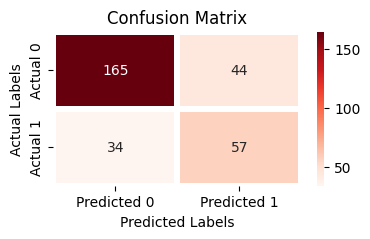

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], linewidth=3)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

plt.show()

When comparing with KNN and Logistic Regression models, the Random Forest model has a lower TN of 165 vs. 173 for KNN and 192 for LR, a higher number of FP of 44 vs. 36 for KNN and 17 for LR – meaning it overpredicts attendance more often. However, it has a significantly higher TP of 57 vs. 49 for KNN and 47 for LR and an improved FN of 34 vs. 42 for KNN and 44 for LR.

The Random Forest model is better at identifying members who will attend the class, improving the recall, even though it has a higher tendency to falsely predict attendance.

#5. Evaluation (Analysis)

##Comparing Model Performance

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

Logistic Regression

In [ ]:
# Compute metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

KNN

In [ ]:
# Compute metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

Random Forest

In [ ]:
# Compute metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

DataFrame

In [ ]:
# Create a DataFrame to hold the results
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors (KNN)', 'Random Forest'],
    'Test Accuracy': [accuracy_lr, accuracy_knn, accuracy_rf],
    'Precision': [precision_lr, precision_knn, precision_rf],
    'Recall': [recall_lr, recall_knn, recall_rf],
    'F1 Score': [f1_lr, f1_knn, f1_rf],
    })

model_results = model_results.round(2)

model_results

,Model,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.80,0.73,0.52,0.61
1,K-Nearest Neighbors (KNN),0.74,0.58,0.54,0.56
2,Random Forest,0.74,0.56,0.63,0.59


Logistic Regression:

Strengths: highest precision and test accuracy.

Weaknesses: recall is relatively low, meaning it misses a large proportion of the actual attendees.

K-Nearest Neighbors (KNN):

Strengths: has balanced precision and recall, but both are lower than the other models.

Weaknesses: lowest F1 score and accuracy overall.'

Random Forest:

Strengths: highest recall and a solid F1 Score, meaning it correctly identifies more actual attendees.

Weaknesses: precision is lower than LR, which means it is more likely to predict attendance incorrectly.

Best Overall Performance:

Random Forest seems to be the best choice for the business goal. It captures more true attendees (higher recall) and has a well-balanced F1 Score. This makes it better suited for minimizing missed attendances while maintaining reasonable precision in your predictions.

##Feature Importance

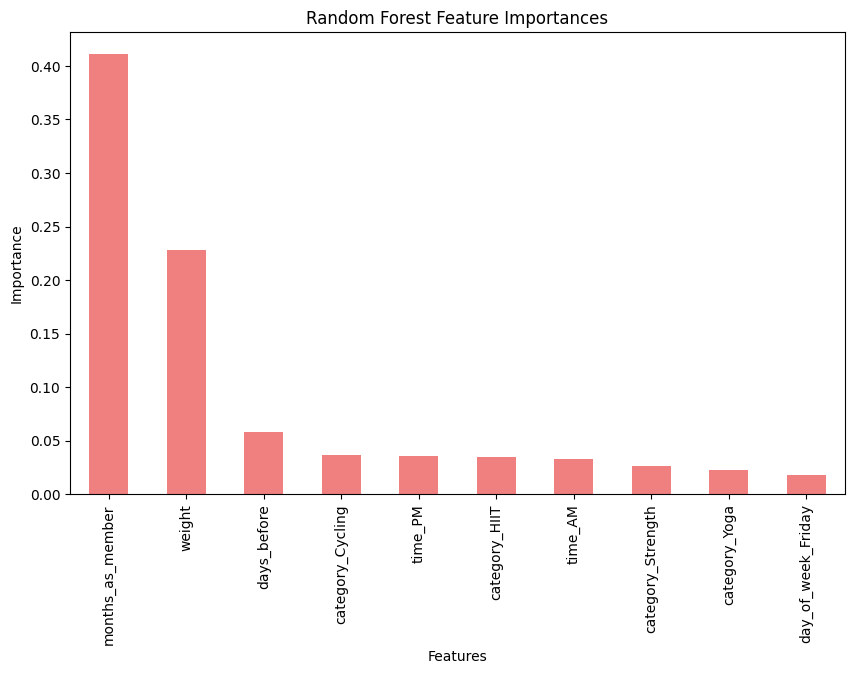

In [ ]:
# Get feature importances from the Random Forest model
rf_importances = pd.Series(best_rf.feature_importances_, index=X_train_resampled.columns)

rf_importances = rf_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar', color = 'lightcoral')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


#6. Deployment (Conclusion)

###Data driven insights

Based on the model’s results and the feature importance analysis, the following data-driven insights can be applied to help GoalZone improve member attendance rates.

**Fidelization Programs:** Loyalty programs can incentivize long-term members, who are more likely to attend booked classes, to engage more actively with the fitness club.

**Targeted Notifications to Members Based on Length of Membership and Model`s Classification:** For new members, who are more likely to not attend their booked classes, and members classified like no-show for the model, reminders could be sent about upcoming classes.

**Class Introduction Videos:** New members tend to not attend the classes they book. One hypothesis for this ia that they are not comfortable showing up to a class they are unfamiliar with or unsure about the activities and their benefits. Creating engaging videos to introduce members to the different class types, formats, activities, and instructors, as well as highlighting the benefits, particularly for weight management, can help members — especially new ones — feel more comfortable and excited to go to the classes.

**Limit Advanced Class Bookings, Confirmation of Booking, and Waitlist:** Encourage members to book classes in advance, with a limit of 2 weeks, to secure a spot in popular classes and avoid being placed on the waitlist. The club could send confirmation requests to members that are likely to not attent to the class, for example, 48 hours before the class, asking them to confirm their attendance. If they do not confirm, the spot will be given to another member of the waitlist. The waitlist could also help the club identify interest in specific classes and times, serving as an indicator for potential creation of additional classes.

**Flexible Class Scheduling:** Offer a variety of classes at different times and days to accommodate members' diverse schedules. Introducing seasonal classes would also provide fresh options for long-term members, reducing potential boredom from repeated classes. This can help ensure sustained engagement among all members.

To increase members' experience, GoalZone could develop an app that incorporates all of these strategies. Features such as booking classes (with a 2-week advance limit), class descriptions, instructor profiles, interactive member communities, and seasonal class promotions could all be integrated into the app. Also, the app could send push notifications for those members classified as 'no-show' asking for confirmation 48 hours before the scheduled class. If the member doesn’t confirm, the spot would automatically be given to someone on the waiting list. Additionally, booking behavior data from the app could be used to continually update the prediction model, improving its accuracy over time.

###Conclusion

This analysis has provided key insights into factors influencing class attendance at GoalZone. The machine learning models, particularly the Random Forest model, identified the most important predictors with length of membership (months as a member) and members' weight being the two most significant ones.

Other factors, like the number of days a class was booked in advance and the class category, also have a moderate impact on attendance rates.

A key finding is that newer and longer-term members show different attendance patterns.

From a business perspective, these insights can help optimize class schedules, reduce no-shows, and increase member engagement through targeted strategies like the members' app.

In terms of model, although the Random Forest model performed well, there is room for improvement. Collecting more data can improve the model's performance, and eventually synthetic data methods may not be needed.

By applying these data-driven insights, GoalZone can make smarter decisions, improve member experience, and bettter utilize resources, boosting business performance.

On a personal level, building this machine learning model to support a business performance has been a nice experience. It allowed me to apply machine learning techniques and to see how data-driven approaches can directly influence business outcomes. Knowing that this project could lead to real improvements in attendance rates and business efficiency brings personal satisfaction and it has reaffirmed my passion for using data to create positive changes.